In [ ]:
import networkx as nx
seed=1000           # seed the graph for reproducibility, you should be doing this  
G= nx.gnp_random_graph (50, .04 )       # here we create a random binomial graph with 1000 nodes and an average (expected) connectivity of 10*.3= 3.
print ( G.nodes())
print(G.size())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
48


Pick paths from G to be modified by the Simulated Annealing algorithm

In [ ]:
for path in nx.all_simple_paths(G, source=0, target=40):
  
  print(path)

Define flow and capacity for the test case graph

In [ ]:
G = nx.Graph()
G.add_edges_from([(0, 1, {'flow': 2}), (0, 1,{'capacity': 6}), (0, 2,{'flow': 3}), (0, 2,{'capacity': 3}), (0,3,{'flow': 3}), (0,3,{'capacity': 5}), (1,2, {'flow': 1}), (1,2,{'capacity': 1}), (1,4, {'flow': 1}), (1,4,{'capacity': 3}), (2,4, {'flow': 3}), (2,4,{'capacity': 7}), (2,5, {'flow': 2}), (2,5,{'capacity': 9}), (3,2, {'flow': 1}), (3,2,{'capacity': 1}), (3,5,{'flow': 2}), (3,5,{'capacity': 2}), (5,4, {'flow': 4}), (5,4,{'capacity': 5})])

In [ ]:
for path in nx.all_simple_paths(G, source=0, target=4):
  print(path)

[0, 1, 2, 4]
[0, 1, 2, 5, 4]
[0, 1, 2, 3, 5, 4]
[0, 1, 4]
[0, 2, 1, 4]
[0, 2, 4]
[0, 2, 5, 4]
[0, 2, 3, 5, 4]
[0, 3, 2, 1, 4]
[0, 3, 2, 4]
[0, 3, 2, 5, 4]
[0, 3, 5, 2, 1, 4]
[0, 3, 5, 2, 4]
[0, 3, 5, 4]


{(0, 1): 2, (0, 2): 3, (0, 3): 3, (1, 2): 1, (1, 4): 1, (2, 4): 3, (2, 5): 2, (2, 3): 1, (3, 5): 2, (4, 5): 4}


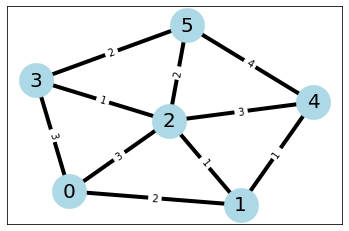

In [ ]:
import matplotlib.pyplot as plt

links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G) 
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='lightblue', linewidths=0.25) # draw nodes
nx.draw_networkx_edges(G, pos, edgelist=links, width=4)                                 # draw edges

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, 'flow')
print(edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()

Apply the Edmonds Karp algorithm on the test graph and print out the flow into the sink node t (4).

In [ ]:
from networkx.algorithms.flow import edmonds_karp
R = edmonds_karp(G, 0, 4)
flow_value = nx.maximum_flow_value(G, 0, 4)
print(flow_value)

10
